In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


## Sklearn Library
from scipy.stats import uniform
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm

In [2]:
df=pd.read_csv(r"C:\Users\DD\OneDrive\Desktop\ML PROJECTS\credit fraud\creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [13]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [15]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# sample 

In [19]:
legit_sample = legit.sample(n=800)

In [20]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
256222,157591.0,-2.456527,2.457377,-0.278652,-1.334673,-0.388679,-0.391650,-0.056992,0.619518,1.626584,...,-0.380373,-0.658302,0.027516,-0.566698,0.093263,-0.311742,-0.077526,-0.124081,3.70,0
221908,142745.0,2.192551,-0.697003,-2.172062,-0.869045,-0.185080,-1.774343,0.265166,-0.576818,-0.790990,...,0.352996,0.872346,-0.113840,-0.075436,0.411358,0.085777,-0.095846,-0.076744,60.44,0
204906,135497.0,2.095278,-0.693180,-1.575512,-0.753739,-0.248853,-0.635268,-0.491066,-0.243448,-0.351194,...,0.123200,0.324586,0.093921,0.424809,-0.044938,-0.230010,-0.002987,-0.009406,70.85,0
178821,123796.0,-0.089165,0.807445,-0.169992,-0.959017,1.048850,-0.200202,0.876518,-0.042459,-0.201535,...,-0.263317,-0.629031,-0.018891,-1.098890,-0.363124,0.176355,0.115003,0.069015,0.89,0
68959,53206.0,1.316849,-0.505091,0.660849,-0.788016,-0.970255,-0.376154,-0.728547,0.076743,-1.054445,...,-0.005768,-0.127366,0.181974,0.197625,0.101996,-0.480864,0.024286,0.010172,3.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [24]:
new_dataset['Class'].value_counts()

Class
0    800
1    492
Name: count, dtype: int64

# Train the model 

In [25]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [27]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
256222,157591.0,-2.456527,2.457377,-0.278652,-1.334673,-0.388679,-0.391650,-0.056992,0.619518,1.626584,...,0.712993,-0.380373,-0.658302,0.027516,-0.566698,0.093263,-0.311742,-0.077526,-0.124081,3.70
221908,142745.0,2.192551,-0.697003,-2.172062,-0.869045,-0.185080,-1.774343,0.265166,-0.576818,-0.790990,...,-0.031527,0.352996,0.872346,-0.113840,-0.075436,0.411358,0.085777,-0.095846,-0.076744,60.44
204906,135497.0,2.095278,-0.693180,-1.575512,-0.753739,-0.248853,-0.635268,-0.491066,-0.243448,-0.351194,...,0.234644,0.123200,0.324586,0.093921,0.424809,-0.044938,-0.230010,-0.002987,-0.009406,70.85
178821,123796.0,-0.089165,0.807445,-0.169992,-0.959017,1.048850,-0.200202,0.876518,-0.042459,-0.201535,...,0.000569,-0.263317,-0.629031,-0.018891,-1.098890,-0.363124,0.176355,0.115003,0.069015,0.89
68959,53206.0,1.316849,-0.505091,0.660849,-0.788016,-0.970255,-0.376154,-0.728547,0.076743,-1.054445,...,0.030210,-0.005768,-0.127366,0.181974,0.197625,0.101996,-0.480864,0.024286,0.010172,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [28]:
Y

256222    0
221908    0
204906    0
178821    0
68959     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 1292, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=80)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1292, 30) (1033, 30) (259, 30)


# Modelbuilding 

In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

LogisticRegression()

In [33]:
model.coef_

array([[-3.13211986e-05,  1.60897874e-01,  1.75202609e-01,
        -4.87694883e-01,  5.18734888e-01,  1.44712143e-01,
        -1.54600926e-01, -6.63488710e-02,  2.40804930e-02,
        -1.54601006e-01, -3.08508230e-01,  2.31229140e-01,
        -4.64667805e-01, -6.49880243e-02, -7.97302869e-01,
        -1.03700161e-01, -2.05438190e-01, -1.99380275e-01,
         1.56797814e-02, -1.88022527e-02,  1.02826591e-01,
         1.74783658e-01,  3.55219889e-02,  1.40924217e-02,
         1.54015796e-04, -3.31503607e-02, -4.30602551e-02,
        -1.71895557e-02,  6.36357850e-02,  1.54872525e-03]])

In [34]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
print('Accuracy on Training data : ', training_data_accuracy*100)

Accuracy on Training data :  94.09486931268151


In [36]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9409486931268151


In [37]:
# accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy on Testing  data : ', training_data_accuracy*100)

Accuracy on Testing  data :  94.09486931268151


In [40]:
print('Accuracy on Testing  data : ', training_data_accuracy)

Accuracy on Testing  data :  0.9409486931268151


In [41]:
Trainpred = model.predict(X_train)
Testpred = model.predict(X_test)

In [43]:
print(sm.classification_report(Y_test,Testpred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       160
           1       0.92      0.91      0.91        99

    accuracy                           0.93       259
   macro avg       0.93      0.93      0.93       259
weighted avg       0.93      0.93      0.93       259



# AUC_ROC Curve

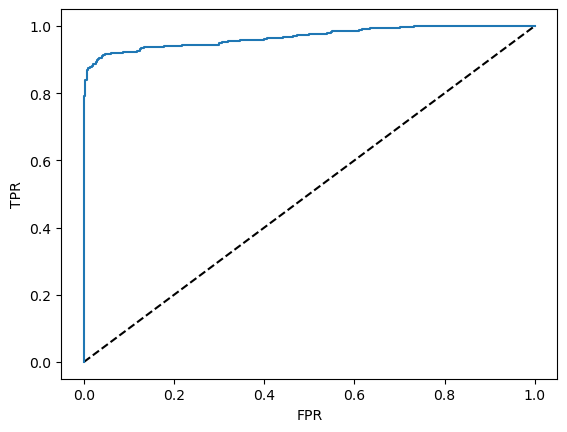

In [44]:
roc = model.predict_proba(X_train)[:,1]
fpr,tpr,threshold = sm.roc_curve(Y_train,roc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [46]:
sm.roc_auc_score(Y_train, roc)

0.9673942430025445

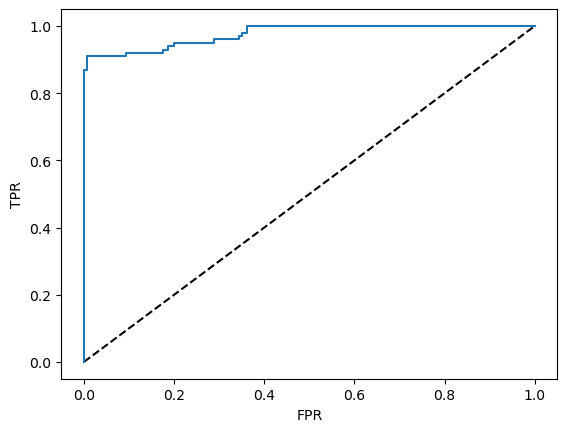

In [45]:
roc1 = model.predict_proba(X_test)[:,1]
fpr,tpr,threshold = sm.roc_curve(Y_test,roc1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [48]:
sm.roc_auc_score(Y_test, roc1)

0.9758838383838384

# Grid search 

In [49]:
param_grid = {
    'penalty':['l1','l2'],
    'C': [0.1,0.5,1,5,10],
    'solver': ['liblinear']
}

In [52]:
grid = GridSearchCV(estimator=model , param_grid=param_grid, cv=5)

In [53]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [54]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [55]:
y_pred = best_model.predict(X_test)

In [56]:
acc = accuracy_score(Y_test,y_pred)
pre = precision_score(Y_test,y_pred)
rec = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
roc_auc = roc_auc_score(Y_test,y_pred)

In [57]:
print(f'''
Best param :{best_param}
Accuracy: {acc}
Precision: {pre}
Recall: {rec}
f1 score: {f1}
AUC-ROC: {roc_auc}
''')


Best param :{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9536679536679536
Precision: 0.9578947368421052
Recall: 0.9191919191919192
f1 score: 0.9381443298969072
AUC-ROC: 0.9470959595959595

